In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# 2.1 Text Corpora 

### Gutenberg Corpus

In [2]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [11]:
for x in range(len(emma)):
    print(emma[x], end=' ')

    if x > 100:
        break;

[ Emma by Jane Austen 1816 ] VOLUME I CHAPTER I Emma Woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her . She was the youngest of the two daughters of a most affectionate , indulgent father ; and had , in consequence of her sister ' s marriage , been mistress of his house from a very early period . Her mother had 

In [5]:
len(emma)

192427

In [12]:
from nltk.corpus import gutenberg

In [13]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [14]:
emma = gutenberg.words('austen-emma.txt')

In [16]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))

    avg_word_len = int(num_chars/num_words)
    avg_sentence_len = int(num_words/num_sents)
    lexical_diversity_score = int(num_words/num_vocab)    # number of times each vocabulary item appears in the text on avg
    
    print(avg_word_len,
          avg_sentence_len,
          lexical_diversity_score,
          fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


### Web and Text Chat Corpus

In [19]:
from nltk.corpus import webtext

In [21]:
for fileid in webtext.fileids():
    print(fileid, 
          webtext.raw(fileid)[:65], 
          '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


In [22]:
from nltk.corpus import nps_chat

In [25]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

print(chatroom[123], end=' ')

['i', 'do', "n't", 'want', 'hot', 'pics', 'of', 'a', 'female', ',', 'I', 'can', 'look', 'in', 'a', 'mirror', '.'] 

### Brown Corpus

In [26]:
from nltk.corpus import brown

In [27]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [28]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [29]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [30]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

In [32]:
### Example of Stylistics
news_text = brown.words(categories='news')
fdist = nltk.FreqDist([w.lower() for w in news_text])
modals = ['can', 'could', 'may', 'might', 'must', 'will']

for m in modals:
    print(m + ':', fdist[m], end=' ')

can: 94 could: 87 may: 93 might: 38 must: 53 will: 389 

In [33]:
adventure_text = brown.words(categories='adventure')
fdist = nltk.FreqDist([w.lower() for w in adventure_text])
modals = ['who', 'what', 'where', 'when', 'why']

for m in modals:
    print(m + ':', fdist[m], end=' ')

who: 95 what: 149 where: 58 when: 173 why: 30 

In [34]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre))

In [35]:
genres = ['news', 'religion', 'hobbies', 'science_fiction', 'romance', 'humor']

In [36]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [37]:
cfd.tabulate(conditions=genres, samples=modals)

                  can could   may might  must  will 
           news    93    86    66    38    50   389 
       religion    82    59    78    12    54    71 
        hobbies   268    58   131    22    83   264 
science_fiction    16    49     4    12     8    16 
        romance    74   193    11    51    45    43 
          humor    16    30     8     8     9    13 


### Reuters Corpus

In [38]:
# this data is split between train/test sets
from nltk.corpus import reuters

In [40]:
reuters.fileids()[1:5]

['test/14828', 'test/14829', 'test/14832', 'test/14833']

In [42]:
reuters.categories()[1:20]

['alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr']

In [43]:
reuters.categories('training/9865')

['barley', 'corn', 'grain', 'wheat']

In [44]:
reuters.categories(['training/9865', 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [46]:
reuters.fileids('barley')[1:20]

['test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428']

In [47]:
reuters.fileids(['barley', 'corn'])[1:20]

['test/14858',
 'test/15033',
 'test/15043',
 'test/15106',
 'test/15287',
 'test/15341',
 'test/15618',
 'test/15648',
 'test/15649',
 'test/15676',
 'test/15686',
 'test/15720',
 'test/15728',
 'test/15845',
 'test/15856',
 'test/15860',
 'test/15863',
 'test/15871',
 'test/15875']

In [48]:
reuters.words('training/9865')[:14]

['FRENCH',
 'FREE',
 'MARKET',
 'CEREAL',
 'EXPORT',
 'BIDS',
 'DETAILED',
 'French',
 'operators',
 'have',
 'requested',
 'licences',
 'to',
 'export']

In [49]:
reuters.words(['training/9865', 'training/9880'])

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [50]:
reuters.words(categories='barley')

['FRENCH', 'FREE', 'MARKET', 'CEREAL', 'EXPORT', ...]

In [51]:
reuters.words(categories=['barley', 'corn'])

['THAI', 'TRADE', 'DEFICIT', 'WIDENS', 'IN', 'FIRST', ...]

### Inaugural Address Corpus

In [52]:
from nltk.corpus import inaugural

In [55]:
inaugural.fileids()[1:20]

['1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt']

In [57]:
print([fileid[:4] for fileid in inaugural.fileids()], end=' ')

['1789', '1793', '1797', '1801', '1805', '1809', '1813', '1817', '1821', '1825', '1829', '1833', '1837', '1841', '1845', '1849', '1853', '1857', '1861', '1865', '1869', '1873', '1877', '1881', '1885', '1889', '1893', '1897', '1901', '1905', '1909', '1913', '1917', '1921', '1925', '1929', '1933', '1937', '1941', '1945', '1949', '1953', '1957', '1961', '1965', '1969', '1973', '1977', '1981', '1985', '1989', '1993', '1997', '2001', '2005', '2009', '2013', '2017', '2021'] 

<Axes: xlabel='Samples', ylabel='Counts'>

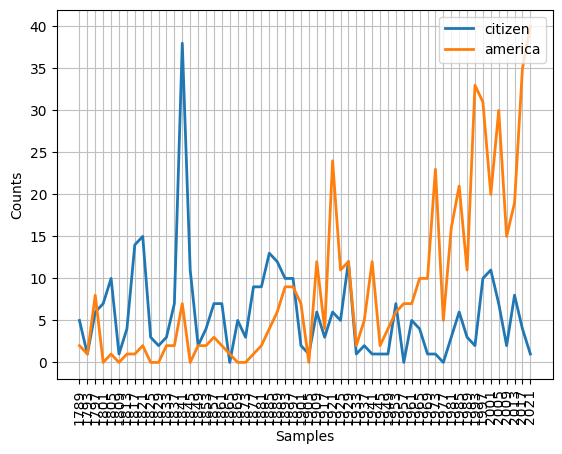

In [61]:
"""

Plot of a conditional frequency distribution: All words in the Inaugural Address Corpus
that begin with america or citizen are counted; separate counts are kept for each address; these are
plotted so that trends in usage over time can be observed; counts are not normalized for document
length. 

"""

cfd = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target))

cfd.plot()

### Corpora in Other Languages

In [62]:
nltk.corpus.cess_esp.words()

['El', 'grupo', 'estatal', 'Electricité_de_France', ...]

In [63]:
nltk.corpus.floresta.words()

['Um', 'revivalismo', 'refrescante', 'O', '7_e_Meio', ...]

In [64]:
nltk.corpus.indian.words('hindi.pos')

['पूर्ण', 'प्रतिबंध', 'हटाओ', ':', 'इराक', 'संयुक्त', ...]

In [66]:
nltk.corpus.udhr.fileids()[1:20]

['Abkhaz-UTF8',
 'Achehnese-Latin1',
 'Achuar-Shiwiar-Latin1',
 'Adja-UTF8',
 'Afaan_Oromo_Oromiffa-Latin1',
 'Afrikaans-Latin1',
 'Aguaruna-Latin1',
 'Akuapem_Twi-UTF8',
 'Albanian_Shqip-Latin1',
 'Amahuaca',
 'Amahuaca-Latin1',
 'Amarakaeri-Latin1',
 'Amuesha-Yanesha-UTF8',
 'Arabela-Latin1',
 'Arabic_Alarabia-Arabic',
 'Asante-UTF8',
 'Ashaninca-Latin1',
 'Asheninca-Latin1',
 'Asturian_Bable-Latin1']

In [67]:
nltk.corpus.udhr.words('Javanese-Latin1')[11:]

['Saben', 'umat', 'manungsa', 'lair', 'kanthi', 'hak', ...]

In [71]:
## Here we can see that the Universal Declaration of Human Rights has different word lengths based on its language

from nltk.corpus import udhr

In [69]:
languages = ['Chickasaw', 'English', 'German_Deutsch',
    'Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']

'Cumulative word length distributions: Six translations of the Universal Declaration of Human Rights are processed; this graph shows that words having five or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text.'

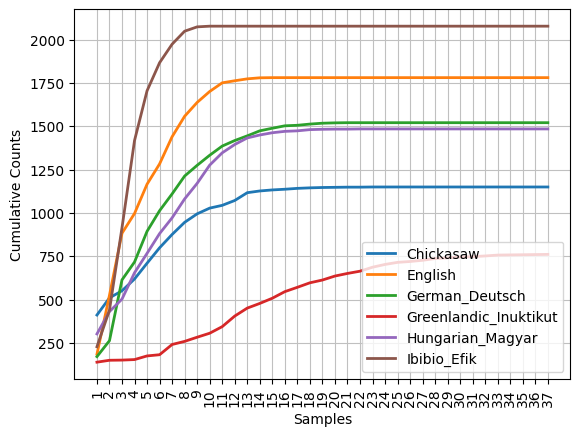

In [73]:
cfd = nltk.ConditionalFreqDist(
    (lang, len(word))
    for lang in languages
    for word in udhr.words(lang + '-Latin1'))

cfd.plot(cumulative=True)

"""Cumulative word length distributions: Six translations of the Universal Declaration of Human Rights are processed; this graph shows that words having five or fewer letters account for about 80% of Ibibio text, 60% of German text, and 25% of Inuktitut text."""

## Text Corpus Structure

In [82]:
raw = gutenberg.raw("burgess-busterbrown.txt")
raw[1:6]

'The A'

In [83]:
words = gutenberg.words("burgess-busterbrown.txt")
words[1:6]

['The', 'Adventures', 'of', 'Buster', 'Bear']

In [84]:
sents = gutenberg.sents("burgess-busterbrown.txt")
sents[1:6]

[['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.'],
 ['Then',
  'he',
  'walked',
  'over',
  'to',
  'a',
  'big',
  'pine',
  '-',
  'tree',
  ',',
  'stood',
  'up',
  'on',
  'his',
  'hind',
  'legs',
  ',',
  'reached',
  'as',
  'high',
  'up',
  'on',
  'the',
  'trunk',
  'of',
  'the',
  'tree',
  'as',
  'he',
  'could',
  ',',
  'and',
  'scratched',
  'the',
  'bark',
  'with',
  'his',
  'great',
  'claws',
  '.']]

## Loading Your Own Corpus

In [86]:
from nltk.corpus import PlaintextCorpusReader

corpus_root = '/usr/share/dict'
wordlists = PlaintextCorpusReader(corpus_root, '.*')

In [ ]:
wordlists.fileids()
wordlists.words('connectives')

# 2.2 Conditional Frequency Distributions